<a href="https://colab.research.google.com/github/AparnaR06/Deep-Learning-Techniques/blob/main/Neural_network_with_one_hidden_layer_Ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 1.0752
Epoch 100, Loss: 3.9473
Epoch 200, Loss: 3.9473
Epoch 300, Loss: 3.2350
Epoch 400, Loss: 3.9473
Epoch 500, Loss: 3.8380
Epoch 600, Loss: 1.6960
Epoch 700, Loss: 2.3720
Epoch 800, Loss: 1.3479
Epoch 900, Loss: 3.2490
Test Accuracy: 78.24%


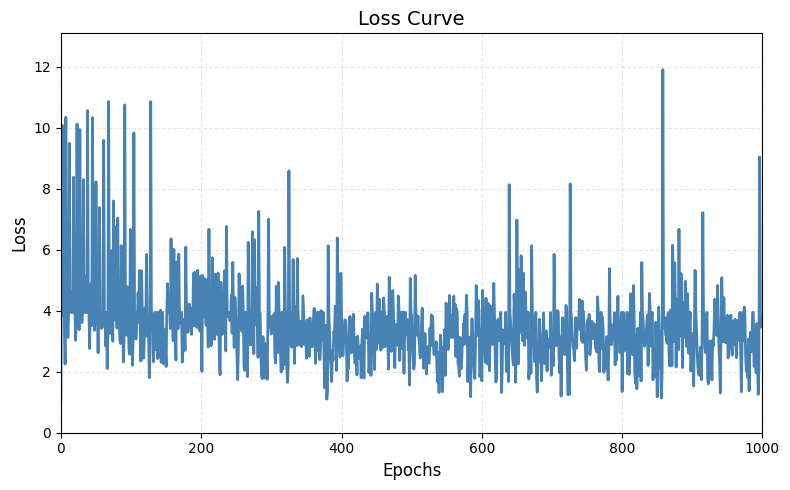

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset from URL
# -------------------------------
url = 'https://gist.githubusercontent.com/RaunakDune/4381ef89d4dc3c66459b1fd80bae254d/raw/Videogame_Sales_2016_Processed.csv'
df = pd.read_csv(url)

# Drop missing data
df = df.dropna(subset=['Global_Sales', 'Year_of_Release'])

# Create binary target: High selling or not
df['High_Seller'] = df['Global_Sales'].apply(lambda x: 1 if x > 1.0 else 0)

# Encode categorical variables
df['Genre'] = pd.factorize(df['Genre'])[0]
df['Publisher'] = pd.factorize(df['Publisher'])[0]
df['Developer'] = pd.factorize(df['Developer'])[0]
df['Rating'] = pd.factorize(df['Rating'])[0]

# Features and target
X = df[['Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating']].values
y = df['High_Seller'].values.reshape(-1, 1)

# -------------------------------
# Preprocessing
# -------------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Neural Network Parameters
# -------------------------------
input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))

W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# -------------------------------
# Activation Functions
# -------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh_derivative(a):
    return 1 - np.power(a, 2)

# -------------------------------
# Training the Network
# -------------------------------
epochs = 1000
lr = 0.01
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Loss calculation (Binary cross-entropy)
    loss = -np.mean(y_train * np.log(A2 + 1e-9) + (1 - y_train) * np.log(1 - A2 + 1e-9))
    losses.append(loss)

    # Backpropagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -------------------------------
# Prediction and Accuracy
# -------------------------------
Z1_test = np.dot(X_test, W1) + b1
A1_test = np.tanh(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)
y_pred = (A2_test > 0.5).astype(int)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# -------------------------------
# Styled Loss Curve Graph
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(losses, color='steelblue', linewidth=2)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(0, len(losses))
plt.ylim(0, max(losses) * 1.1)
plt.tight_layout()
plt.show()
